In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("results", exist_ok=True)
df.to_csv("results/processed_data.csv", index=False)
summary = df.describe()
summary.to_csv("results/summary_statistics.csv")

In [ ]:
from google.colab import files

uploaded = files.upload()
csv_filename = list(uploaded.keys())[0]
df = pd.read_csv(csv_filename)
df.columns = df.columns.str.strip().str.replace(' ', '_')


Saving raw_data.csv to raw_data (1).csv


In [66]:

df['Height_m'] = df['Height'] * 0.0254        # inches → meters
df['Weight_kg'] = df['Weight'] * 0.45359237   # pounds → kilograms
df['BMI'] = (df['Weight_kg'] / (df['Height_m']**2)).round(2)

def assign_age_group(age):
    if age < 30:
        return '<30'
    elif age <= 45:
        return '30–45'
    elif age <= 60:
        return '46–60'
    else:
        return '>60'

df['AgeGroup'] = df['Age'].apply(assign_age_group)


df['Frailty_binary'] = df['Frailty'].map({'Y': 1, 'N': 0}).astype('int8')

age_dummies = pd.get_dummies(df['AgeGroup'], prefix='AgeGroup')
df = pd.concat([df, age_dummies], axis=1)

print(df[['Height','Height_m','Weight','Weight_kg','BMI','Age','AgeGroup','Frailty_binary']].head())


   Height  Height_m  Weight  Weight_kg    BMI  Age AgeGroup  Frailty_binary
0    65.8   1.67132     112  50.802345  18.19   30    30–45               0
1    71.5   1.81610     136  61.688562  18.70   19      <30               0
2    69.4   1.76276     153  69.399633  22.33   45    30–45               0
3    68.2   1.73228     142  64.410117  21.46   22      <30               1
4    67.8   1.72212     144  65.317301  22.02   29      <30               1


In [58]:
df.to_csv("processed_data.csv", index=False)

print("\n Processed data saved as processed_data.csv")


 Processed data saved as processed_data.csv


In [60]:
summary = df.describe().T[["mean", "50%", "std"]]  # 50% is median
summary.rename(columns={"50%": "median"}, inplace=True)
os.makedirs("Q1_Frailty_Workflow/reports", exist_ok=True)
with open("Q1_Frailty_Workflow/reports/findings.md", "w") as f:
    f.write("# Frailty Dataset Report\n\n")
    f.write("## Summary Statistics\n\n")
    f.write(summary.to_markdown())
    f.write("\n\n")


In [65]:
print("Summary Table:")
print(summary)
print("\nCorrelation between Grip strength and Frailty_binary:", round(correlation, 3))

Summary Table:
                      mean      median        std
Height           68.600000   68.450000   1.670662
Weight          131.900000  136.000000  14.231811
Age              32.500000   29.500000  12.860361
Grip_strength    26.000000   27.000000   4.521553
Height_m          1.742440    1.738630   0.042435
Weight_kg        59.828834   61.688562   6.455441
BMI              19.682000   19.185000   1.780972
Frailty_binary    0.400000    0.000000   0.516398
AgeGroup_>60      0.000000    0.000000   0.000000
AgeGroup_>60      0.000000    0.000000   0.000000

Correlation between Grip strength and Frailty_binary: -0.476


/tmp/ipython-input-439135738.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AgeGroup', data=df, palette='Set2')


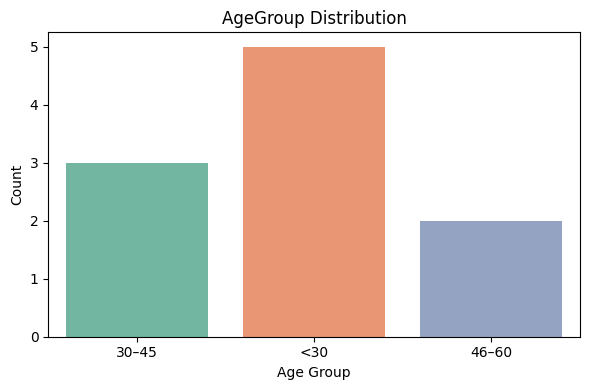

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='AgeGroup', data=df, palette='Set2')
plt.title('AgeGroup Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig("results/AgeGroup_counts.png")
plt.show()


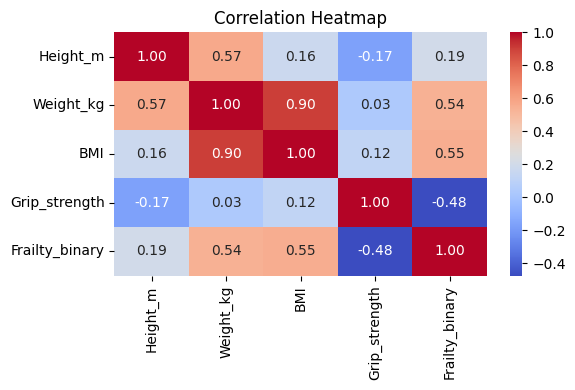

In [ ]:
plt.figure(figsize=(6,4))
numeric_cols = ['Height_m','Weight_kg','BMI','Grip_strength','Frailty_binary']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig("results/correlation_heatmap.png")
plt.show()
